In [ ]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [2]:
## Read the data from the CSV file into a pandas DataFrame
data=pd.read_csv("Algerian_forest_fires_cleaned.csv")

In [3]:
## Display the contents of the DataFrame
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:

# Check for missing values in the DataFrame and calculate the sum of missing values for each column
data.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [ ]:

# Display concise summary information about the 'data' DataFrame, including column names, data types, and non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [6]:
# Check for and count duplicate rows in the DataFrame.
data.duplicated().sum()

0

In [7]:

# Generate descriptive statistics of the numerical columns in the 'data' DataFrame, including count, mean, standard deviation, minimum, quartiles, and maximum values.
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [8]:
# Remove leading and trailing whitespaces from the values in the 'Classes' column of the 'data' DataFrame.
data['Classes'] = data['Classes'].str.strip()

In [9]:
# Display the  DataFrame
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [10]:
# Initialize OneHotEncoder to convert categorical variable(s) into binary vectors.
encoder = OneHotEncoder(sparse=False)

# Fit and transform the 'Classes' column to create binary vectors representing each class.
encoded_classes = encoder.fit_transform(data[['Classes']])

# Assign the encoded values to new columns in the DataFrame: 'Classes_fire' and 'Classes_not_fire'.
data[['Classes_fire', 'Classes_not_fire']] = encoded_classes

# Drop the original 'Classes' column as it's no longer needed.
data.drop(columns=['Classes'], inplace=True)

h:\Anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
# Drop the 'year' column from the DataFrame and assign the result back to the 'data' variable.
data = data.drop(columns=['year'])

# Display the updated DataFrame.
data

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not_fire
0,1,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0.0,1.0
1,2,6,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0.0,1.0
2,3,6,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0.0,1.0
3,4,6,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0.0,1.0
4,5,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1.0,0.0
239,27,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,0.0,1.0
240,28,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,0.0,1.0
241,29,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,0.0,1.0


In [12]:
# Calculate the correlation matrix for the DataFrame 'data' and round the correlation coefficients to two decimal places.
correlation = data.corr().round(2)

# Display the correlation matrix.
correlation

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Classes_fire,Classes_not_fire
day,1.00,-0.00,0.10,-0.08,0.05,-0.11,0.22,0.49,0.53,0.18,0.52,0.35,0.00,0.20,-0.20
month,-0.00,1.00,-0.06,-0.04,-0.04,0.03,0.02,0.07,0.13,0.07,0.09,0.08,0.00,0.02,-0.02
Temperature,0.10,-0.06,1.00,-0.65,-0.28,-0.33,0.68,0.49,0.38,0.60,0.46,0.57,0.27,0.52,-0.52
RH,-0.08,-0.04,-0.65,1.00,0.24,0.22,-0.64,-0.41,-0.23,-0.69,-0.35,-0.58,-0.40,-0.43,0.43
Ws,0.05,-0.04,-0.28,0.24,1.00,0.17,-0.17,-0.00,0.08,0.01,0.03,0.03,-0.18,-0.07,0.07
Rain,-0.11,0.03,-0.33,0.22,0.17,1.00,-0.54,-0.29,-0.30,-0.35,-0.30,-0.32,-0.04,-0.38,0.38
FFMC,0.22,0.02,0.68,-0.64,-0.17,-0.54,1.00,0.60,0.51,0.74,0.59,0.69,0.22,0.77,-0.77
DMC,0.49,0.07,0.49,-0.41,-0.00,-0.29,0.60,1.00,0.88,0.68,0.98,0.88,0.19,0.59,-0.59
DC,0.53,0.13,0.38,-0.23,0.08,-0.30,0.51,0.88,1.00,0.51,0.94,0.74,-0.08,0.51,-0.51
ISI,0.18,0.07,0.60,-0.69,0.01,-0.35,0.74,0.68,0.51,1.00,0.64,0.92,0.26,0.74,-0.74


<Axes: >

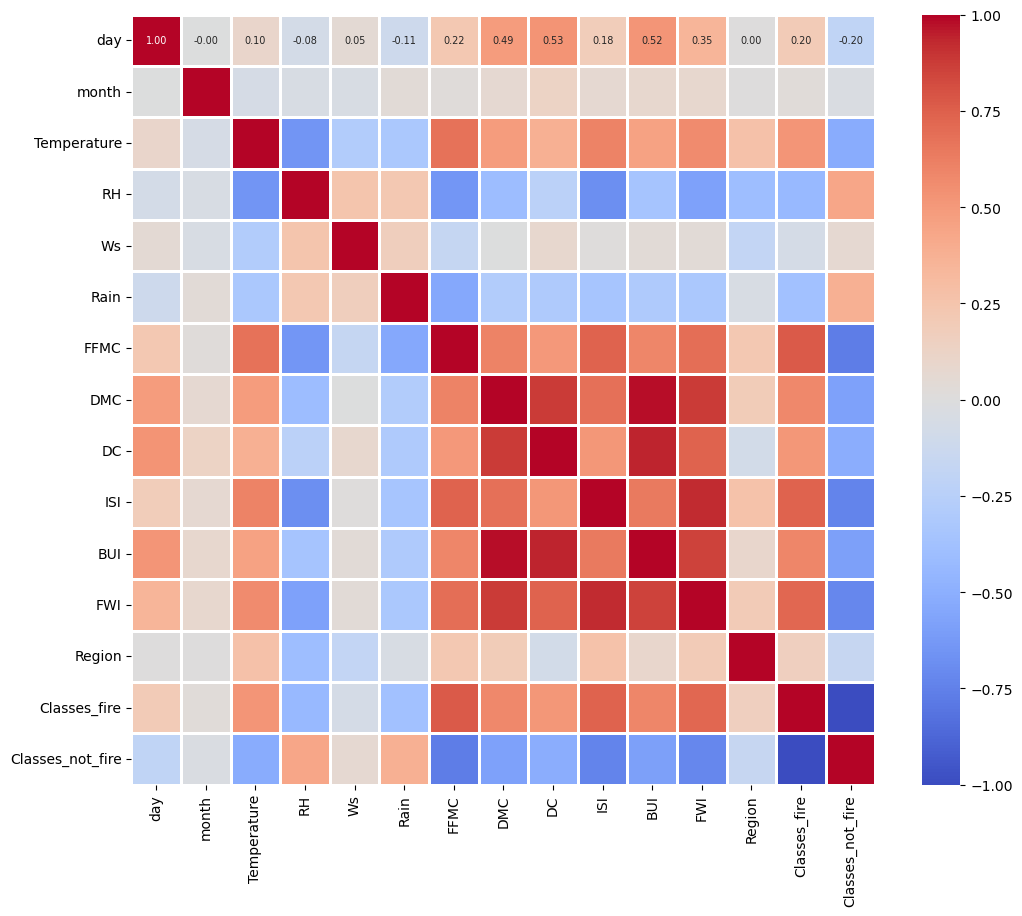

In [13]:
# Exploratory Data Analysis (EDA) - Visualizing Data

# Plot a heatmap to visualize the correlation matrix of the 'data' DataFrame.
plt.figure(figsize=(12, 10))
sns.heatmap(data.correlation(), cmap='coolwarm', annot=True, linewidths=1, linecolor='white', fmt=".2f", annot_kws={"fontsize": 7})

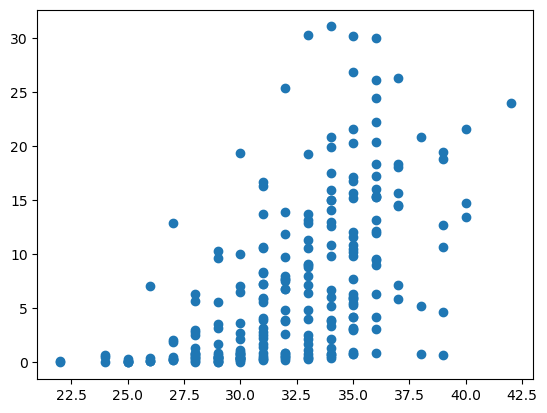

In [14]:
# Create a scatter plot to visualize the relationship between 'Temperature' and 'FWI' (Fire Weather Index) columns in the DataFrame 'data'.
plt.scatter(data['Temperature'], data['FWI'])

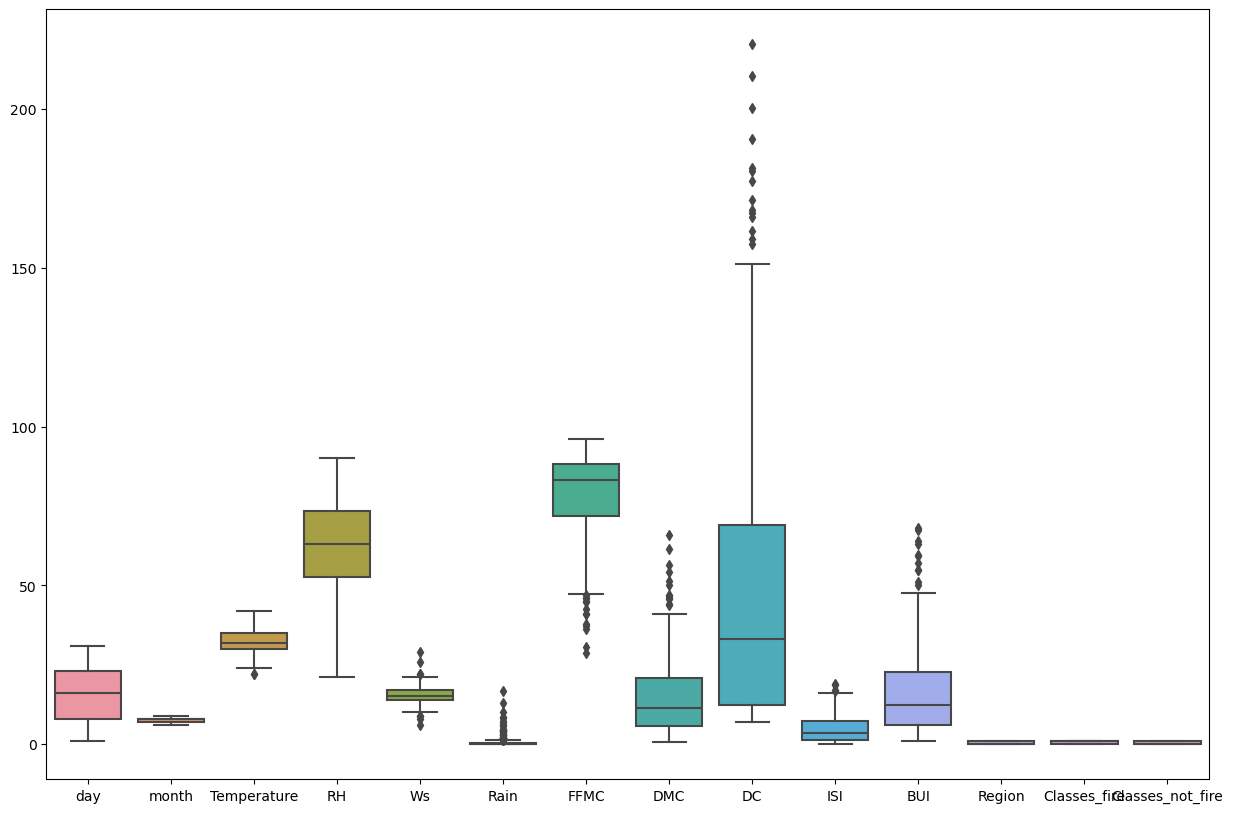

In [15]:
# Create boxplots for all input variables in the DataFrame 'data', excluding the 'FWI' column.
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.drop(columns=['FWI']))
plt.show()

In [16]:
# Outlier Removal

# Select only numerical columns for outlier detection
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
 
# Calculate the Interquartile Range (IQR) for each numerical column
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [17]:
# Define a threshold to identify outliers (e.g., 1.5 times the IQR)
threshold = 1.5
 
# Identify outliers using the IQR method
outliers = data[((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]
 
# Display identified outliers
print("\nOutliers:")
print(outliers)


Outliers:
     day  month  Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  \
1      2      6           29  61  13   1.3  64.4   4.1   7.6  1.0   3.9  0.4   
2      3      6           26  82  22  13.1  47.1   2.5   7.1  0.3   2.7  0.1   
3      4      6           25  89  13   2.5  28.6   1.3   6.9  0.0   1.7  0.0   
14    15      6           28  80  17   3.1  49.4   3.0   7.4  0.4   3.0  0.1   
15    16      6           29  89  13   0.7  36.1   1.7   7.6  0.0   2.2  0.0   
..   ...    ...          ...  ..  ..   ...   ...   ...   ...  ...   ...  ...   
218    6      9           34  71  14   6.5  64.5   3.3   9.1  1.0   3.5  0.4   
231   19      9           29  41   8   0.1  83.9  24.9  86.0  2.7  28.9  5.6   
236   24      9           26  49   6   2.0  61.3  11.9  28.1  0.6  11.9  0.4   
239   27      9           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0   
240   28      9           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2   

     Region  Classes_fire  C

In [18]:
# Remove outliers from the dataset
cleaned_df = data[~((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]
 
# Display the cleaned dataset
print("\nCleaned dataset:")
print(cleaned_df)


Cleaned dataset:
     day  month  Temperature  RH  Ws  Rain  FFMC   DMC     DC  ISI   BUI  \
0      1      6           29  57  18   0.0  65.7   3.4    7.6  1.3   3.4   
4      5      6           27  77  16   0.0  64.8   3.0   14.2  1.2   3.9   
5      6      6           31  67  14   0.0  82.6   5.8   22.2  3.1   7.0   
6      7      6           33  54  13   0.0  88.2   9.9   30.5  6.4  10.9   
7      8      6           30  73  15   0.0  86.6  12.1   38.3  5.6  13.5   
..   ...    ...          ...  ..  ..   ...   ...   ...    ...  ...   ...   
235   23      9           35  56  14   0.0  89.0  29.4  115.6  7.5  36.0   
237   25      9           28  70  15   0.0  79.9  13.8   36.1  2.4  14.1   
238   26      9           30  65  14   0.0  85.4  16.0   44.5  4.5  16.9   
241   29      9           24  54  18   0.1  79.7   4.3   15.2  1.7   5.1   
242   30      9           24  64  15   0.2  67.3   3.8   16.5  1.2   4.8   

      FWI  Region  Classes_fire  Classes_not_fire  
0     0.5       0

In [19]:
# Set the input variables (features) by dropping the 'FWI' column from the DataFrame 'data'.
X = data.drop(columns=["FWI"])

# Set the target variable by selecting only the 'FWI' column from the DataFrame 'data'.
Y = data['FWI']

In [20]:
# Split the dataset into training and testing sets using train_test_split function from scikit-learn.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [21]:
# Scale the input features using StandardScaler from scikit-learn.
scaler = StandardScaler()

# Fit and transform the training data
X_train_Scale = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_Scale = scaler.transform(X_test)

In [23]:
# Initialize the Linear Regression model.
mlr = LinearRegression()

# Fit the model to the scaled training data.
mlr.fit(X_train_Scale, Y_train)

LinearRegression()

In [24]:
# Retrieve the coefficients (weights) and intercept of the trained Linear Regression model.
mlr.coef_, mlr.intercept_

(array([ 0.09571795,  0.06013081, -0.0536601 , -0.20736335, -0.0683784 ,
        -0.01347584, -0.87493812,  0.04241981, -0.78918824,  4.97062947,
         4.37870113, -0.19538886,  0.15377282, -0.15377282]),
 7.12764705882353)

In [26]:
# Predict the output variable 'FWI' using the trained Linear Regression model on the scaled testing data.
y_pred = mlr.predict(X_test_Scale)

In [27]:
# Evaluate the performance of the Linear Regression model.

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(Y_test, y_pred)

# Calculate R-squared (R2) score
r2 = r2_score(Y_test, y_pred)

# Print evaluation metrics
print('r2:', r2)
print('mae:', mae)
print('mse:', mse)

r2: 0.9893644206117114
mae: 0.4965732215343409
mse: 0.47537239876317233


In [28]:
# Create pickle files to save the trained Linear Regression model and scaler for future use.

import pickle

# Save the trained Linear Regression model to a pickle file
pickle.dump(mlr, open('mk_mlr_assign.pkl', 'wb'))  # 'wb' means write bytes

# Save the scaler to a pickle file
pickle.dump(scaler, open('mk_scaler_assign.pkl', 'wb'))